Peter Sawyer


Import stuff:

In [1]:
from perceptron import PerceptronClassifier
import matplotlib.pyplot as plt
from arff import Arff
import numpy as np

Because most of the code has been fairly repetative, the code will be run from a standard template

In [2]:
def runMahCode(arff, shuffle=True, determ=0, training=False, lr=.1, quiet=False):
    mat = Arff(arff,label_count=1)
    data = mat.data[:,0:-1]
    labels = mat.data[:,-1:]
    PClass = PerceptronClassifier(lr=lr,shuffle=shuffle,deterministic=determ)
    Accuracy = 0.0
    if (training):
        X_train, y_train, X_test, y_test = PerceptronClassifier.split_training(data,labels)
        PClass.fit(X_train,y_train)
        Accuracy = PClass.score(X_test,y_test)
    else:
        PClass.fit(data,labels)
        Accuracy = PClass.score(data,labels)
    if not quiet:
        print("Accuracy = [{:.5f}]".format(Accuracy))
        print("Final Weights =",PClass.get_weights())
    else:
        return Accuracy

# 1. Implement the code

In [4]:
runMahCode("../data/perceptron/debug/linsep2nonorigin.arff",False, 10)

Accuracy = [0.87500]
Final Weights = [-0.23  0.18 -0.1 ]


Note that I increased the precision from the standard 2. With rounding, the debug works as expected.

In [5]:
runMahCode("../data/perceptron/evaluation/data_banknote_authentication.arff",
           shuffle=False,determ=10)

Accuracy = [0.98761]
Final Weights = [-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]


On the eval, we got an accuracy of .987, which is pretty good

My stopping algorithm keeps track of the score over time, stops after no improvement for a default of 10 epochs, and restoring the best result of those last 10.

# 2. Create two text files

In [6]:
cat "linSep.csv"

inA,inB,out
-0.2,0.3,1
0.8,0,0
-0.5,0.6,1
-0.1,0.9,1
0.2,-0.5,0
1,0.1,0
0.4,-0.5,0
-1,-0.1,1


In [7]:
cat "nonLinSep.csv"

inA,inB,out
-0.2,0.3,1
1,-0.95,0
-0.5,0.6,1
-0.1,0.3,1
-0.9,-1,0
-0.85,0.9,0
0.9,1,0
-0.2,-0.5,1


In [8]:
linSep = np.genfromtxt('linSep.csv', delimiter=',',skip_header=1)
nonLin = np.genfromtxt("nonLinSep.csv", delimiter=",",skip_header=1)

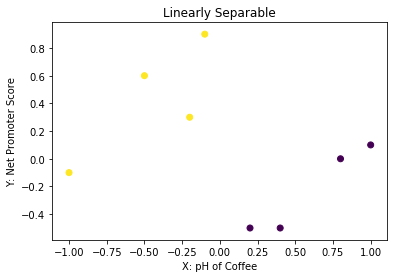

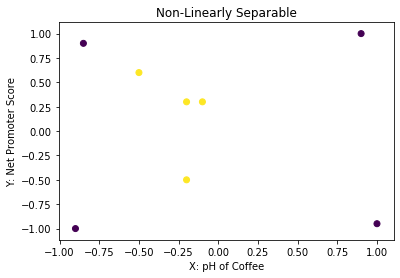

In [9]:
plt.scatter(linSep[:,0],y=linSep[:,1],c=linSep[:,2])
plt.title("Linearly Separable")
plt.ylabel("Y: Net Promoter Score")
plt.xlabel("X: pH of Coffee")
plt.show();


plot = plt.scatter(nonLin[:,0],y=nonLin[:,1],c=nonLin[:,2])
plt.title("Non-Linearly Separable")
plt.ylabel("Y: Net Promoter Score")
plt.xlabel("X: pH of Coffee")
plt.show();
# add the plot later

# 3. Train on both sets

Linearly Separable:

In [10]:
data = linSep[:,:-1]
labels = linSep[:,-1:]
for lr in np.linspace(.01, 1, 10):
    PClass = PerceptronClassifier(lr=lr,shuffle=True,deterministic=0)
    PClass.fit(data,labels)
    Accuracy = PClass.score(data,labels)
    print(Accuracy)

ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0
ran 2 iterations
1.0


Because everything is centered very close to zero, it doesn't take very long for the learning rate to differentiate the two sets. 

We also see that the learning rate doesn't change much.

In [11]:
data = nonLin[:,:-1]
labels = nonLin[:,-1:]
for lr in np.linspace(.01, 1, 10):
    PClass = PerceptronClassifier(lr=lr,shuffle=True,deterministic=0)
    PClass.fit(data,labels)
    Accuracy = PClass.score(data,labels)
    print(Accuracy)

ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375
ran 11 iterations
0.375


Again, the learning rate had almost no impact

In [12]:
data = nonLin[:,:-1]
labels = nonLin[:,-1:]

PClass = PerceptronClassifier(lr=.1,shuffle=True,deterministic=0)
PClass.fit(data,labels)
Accuracy = PClass.score(data,labels)
print(Accuracy)
w = PClass.get_weights()

ran 11 iterations
0.375


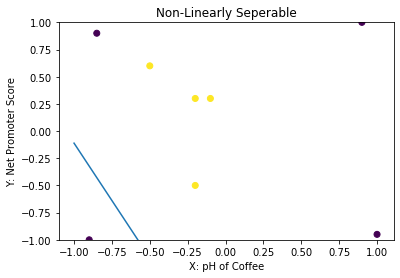

In [13]:
# Non-Linearly Separable
x = np.linspace(-1, 1, 100)
w1,w2,b = w
plt.title("Non-Linearly Seperable")
plt.ylabel("Y: Net Promoter Score")
plt.xlabel("X: pH of Coffee")
plt.scatter(nonLin[:,0],y=nonLin[:,1],c=nonLin[:,2])
plt.plot(x, (-w1/w2)*x + (-b / w2))
plt.ylim([-1,1])
plt.show()

It's pretty bad. I'm not quite sure why the weights are so off. Given more time, I might try to refine the algorithm, or start with random weights to see if that changes anything

In [14]:
data = linSep[:,:-1]
labels = linSep[:,-1:]

PClass = PerceptronClassifier(lr=.1,shuffle=True,deterministic=0)
PClass.fit(data,labels)
Accuracy = PClass.score(data,labels)
print(Accuracy)
w = PClass.get_weights()
print(w)

ran 2 iterations
1.0
[-0.1   0.03  0.  ]


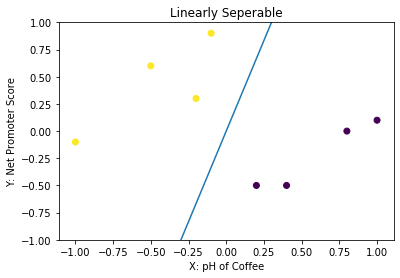

In [15]:
# Linearly Separable
x = np.linspace(-1, 1, 100)
w1,w2,b = w
plt.title("Linearly Seperable")
plt.ylabel("Y: Net Promoter Score")
plt.xlabel("X: pH of Coffee")
plt.scatter(linSep[:,0],y=linSep[:,1],c=linSep[:,2])
plt.plot(x, (-w1/w2)*x + (-b / w2))
plt.ylim([-1,1])
plt.show()

That's more like it. Probably because it's a super easy data set, but still not bad.

# 4. Learn Voting
First I want to know the baseline if I just try to fit on the entire dataset

In [16]:
runMahCode("standardVoting.arff")

ran 34 iterations
Accuracy = [0.97397]
Final Weights = [ 1.00000000e-01 -1.00000000e-01 -8.00000000e-01  1.90000000e+00
  3.00000000e-01 -1.00000000e-01  2.00000000e-01  4.00000000e-01
 -7.00000000e-01  3.00000000e-01 -1.10000000e+00  2.77555756e-17
  1.00000000e-01 -1.00000000e-01 -3.00000000e-01  6.00000000e-01
 -1.10000000e+00]


Now trying it slightly random five times:

In [17]:
mat = Arff("standardVoting.arff",label_count=1)
data = mat.data[:,0:-1]
labels = mat.data[:,-1:]
test = []
train = []
iters = []
all_scores = []
print("Iterations | Training | Testing")
for i in range(5):
    PClass = PerceptronClassifier(lr=.1,shuffle=True)
    Accuracy = 0.0
    X_train, y_train, X_test, y_test = PerceptronClassifier.split_training(data,labels)
    trash, iterr, scores = PClass.fit(X_train,y_train, quiet=True)
    all_scores.append(scores)
    training = PClass.score(X_train,y_train)
    testing = PClass.score(X_test,y_test)
    print("    {:}     |  {:.4f}  | {:.4f}".format(iterr, training, testing))
    iters.append(iterr)
    test.append(testing)
    train.append(training)
print(f"avg iter: {np.mean(iters)}")
print(f"avg training: {np.mean(train)}")
print(f"avg test: {np.mean(test)}")

Iterations | Training | Testing
    24     |  0.9752  | 0.9710
    22     |  0.9783  | 0.9493
    23     |  0.9721  | 0.9493
    29     |  0.9628  | 0.9928
    27     |  0.9814  | 0.9203
avg iter: 25.0
avg training: 0.9739938080495356
avg test: 0.9565217391304348


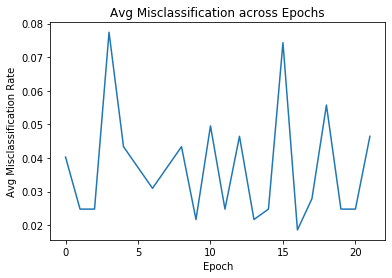

In [18]:
averages = []
minLen = min(iters)
#print(min(all_scores[:], [key=len]))
for i in range(minLen):
    averages.append(np.mean(scores[:][i]))
averages = np.array(averages)
plt.plot(np.abs(1-averages))
plt.title("Avg Misclassification across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Avg Misclassification Rate")
plt.show()


In [19]:
runMahCode("standardVoting.arff")

ran 34 iterations
Accuracy = [0.97397]
Final Weights = [ 1.00000000e-01 -1.00000000e-01 -8.00000000e-01  1.90000000e+00
  3.00000000e-01 -1.00000000e-01  2.00000000e-01  4.00000000e-01
 -7.00000000e-01  3.00000000e-01 -1.10000000e+00  2.77555756e-17
  1.00000000e-01 -1.00000000e-01 -3.00000000e-01  6.00000000e-01
 -1.10000000e+00]


From this, we see that the physician fee freeze is the strongest identifing feature, followed by imigration, adoption of the budget resolution, mx missle, and then export-addministration act in south africa. We see that Synfuels cutback doesn't matter. 

# 5. scikit-learn

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [21]:
ptron = Perceptron(tol=1e-3, random_state=0)
mat = Arff("standardVoting.arff",label_count=1)
data = mat.data[:,0:-1]
labels = mat.data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [22]:
ptron.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
ptron.score(X_test,y_test)

0.9064748201438849

We see that our naive perceptron does fairly well compaired to the sklearn version. 

# 6. Iris Data Set

In [24]:
from sklearn.datasets import load_iris

In [25]:
X,y = load_iris(True)

In [26]:
labels = ['setosa', 'versicolor', 'virginica']

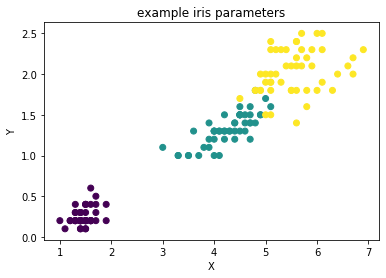

In [27]:
plt.scatter(X[:,2],X[:,3],c=y )
plt.title("example iris parameters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
def giveOneValue(y, value):
    return 1 if (y==value) else 0

In [29]:
give1 = np.vectorize(giveOneValue)

In [45]:
ptrons = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for i in range(3):
    y_new = give1(y_train,i)
    new_ptron = ptron.fit(X_train,y_new)
    ptrons.append(new_ptron)
#     print(y_new-y_train)

In [46]:
ptrons


[Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False),
 Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False),
 Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False)]

In [47]:
for i in range(3):
    print(f"For {labels[i]}, the accuracy is {ptrons[i].score(X_test,give1(y_test,i))}")

For setosa, the accuracy is 0.24444444444444444
For versicolor, the accuracy is 0.37777777777777777
For virginica, the accuracy is 0.9777777777777777


From the example graph, we could see that the virginica was generally well split from the other two types, while the other two sets are more mixed, and thus harder to separate with a linear model.